In [305]:
#importing necessary libraries

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [307]:
#imported test dataset and train dataset

In [360]:
data=pd.read_csv("train.csv",low_memory=False)
test=pd.read_csv("test.csv",low_memory=False).copy()

In [361]:
#getting info about dataset

In [362]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [363]:
data.shape,test.shape #getting information about row and column of train and test dataset

((8523, 12), (5681, 11))

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [365]:
#tset data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [366]:
#checking for null values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [367]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [368]:
#there is missing values in 'Outlet_Size' and 'Item_Weight'

In [369]:
#since 'Item_Weight' is float type of data set we fill missing value using mean

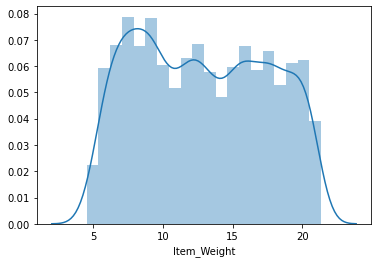

In [370]:
sns.distplot(data['Item_Weight'])

In [371]:
mean=data['Item_Weight'].mean()

data['Item_Weight'] = data['Item_Weight'].fillna(mean)

In [372]:
#since 'Outlet_Size' is categorical data type we fill it using mode

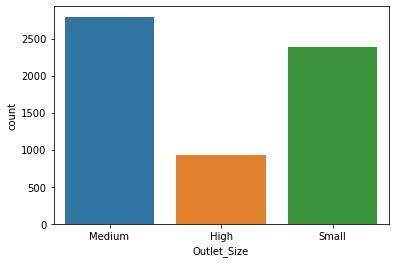

In [373]:
sns.countplot(data['Outlet_Size'])
plt.show()

In [374]:
mode = data['Outlet_Size'].mode()[0]
mode #we get 'Medium' as mode 

'Medium'

In [375]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(mode)

In [376]:
#chceking for null values again
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [377]:
data.describe() #lloking at statistical summary

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [378]:
#performing data cleaning on test data

In [379]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

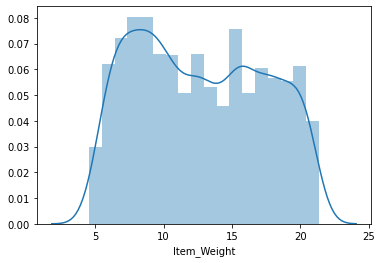

In [380]:
sns.distplot(test['Item_Weight'])


In [381]:
mean_test=test['Item_Weight'].mean()

In [382]:
test['Item_Weight'] = test['Item_Weight'].fillna(mean_test)

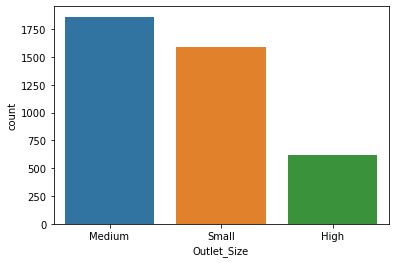

In [383]:
#since 'Outlet_Size' is categorical data type we fill it using mode

sns.countplot(test['Outlet_Size'])
plt.show()



In [384]:
mode_test = test['Outlet_Size'].mode()[0]
mode_test #we get 'Medium' as mode 



'Medium'

In [385]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(mode_test)

#chceking for null values again
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [386]:
#explorartory data analysis

In [387]:
data['Item_Fat_Content'].value_counts() #we get that LF,low fat are same as Low Fat and reg is same as regular

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [388]:
#replacing 'LF' and 'reg' with 'Low Fat','Regular'
data['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],['Low Fat','Regular','Low Fat','Regular','Low Fat'],inplace=True)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

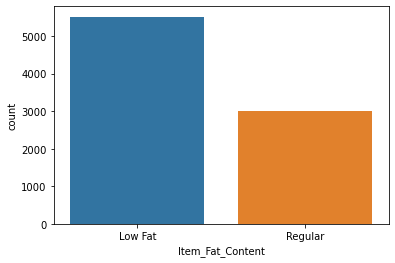

In [389]:
sns.countplot(data['Item_Fat_Content'])
plt.show()


In [390]:
##replacing 'LF' and 'reg' with 'Low Fat','Regular' in test data
#test data

In [391]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [392]:
test['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],['Low Fat','Regular','Low Fat','Regular','Low Fat'],inplace=True)
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

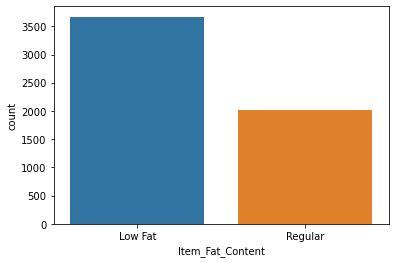

In [393]:
sns.countplot(test['Item_Fat_Content'])
plt.show()

In [394]:
#label encoding for train dataset
cat_cols = ['Item_Identifier', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
label_enc = {}
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    data[col] = data[col].astype(str)
    enc = LabelEncoder().fit(data[col])
    data[col] = enc.transform(data[col])
    label_enc[col] = enc

In [395]:
#label encoding for test dataset
cat_cols_test = ['Item_Identifier', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

for col in cat_cols_test:
    test[col] = test[col].astype(str)
    enc = LabelEncoder().fit(test[col])
    test[col] = enc.transform(test[col])
    label_enc[col] = enc

In [396]:
#taking first 5 rows of train set
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,1976
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,2316
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,912
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,3185
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,3488


In [397]:
#taking first 5 rows of test set
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [398]:
test['Item_Outlet_Sales'] = 0
df= pd.concat([data, test], sort = False)

In [399]:
test.shape,df.shape,data.shape

((5681, 12), (14204, 12), (8523, 12))

In [400]:
#splitting into target and features
x = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [401]:
#x_train=

In [402]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                    test_size=0.3999,random_state=134)

In [403]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((8523, 11), (5681, 11), (8523,), (5681,))

In [404]:
#decision tree

In [405]:
from sklearn.metrics import r2_score

#decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

r2_score(y_test, y_pred)

-0.700880134481094

It give r2 value of -0.700880134481094 which is not good

In [406]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

r2_score(y_test, y_pred)

0.00017661917158651175

Linear regreesion gives r2 value of 0.00017661917158651175 which is also not good

In [407]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

r2_score(y_test, y_pred)

0.08062621924700941

Random Forest gives r2 score of 0.08062621924700941 which is good. so we do hyperparameter tuning

In [416]:
#cross_val_score
from sklearn.model_selection import cross_val_score

In [417]:
rf = RandomForestRegressor()

In [418]:
cv_results = cross_val_score(rf, x_train, y_train, cv= 5, scoring="r2")

cv_results

cv_results.mean()

0.08375845185730982

In the above step we understood random forest model improved

In [419]:
test1=pd.read_csv("test.csv",low_memory=False)

In [420]:
sample =test1[['Item_Identifier','Outlet_Identifier']].copy()

In [421]:
sample.shape

(5681, 2)

In [422]:
sample['Item_Outlet_Sales']=y_pred

In [423]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,0.00
1,FDW14,OUT017,0.00
2,NCN55,OUT010,1619.41
3,FDQ58,OUT017,892.07
4,FDY38,OUT027,943.84


In [426]:
sample.to_csv("submission_file1.csv", index=False)